# MARATÓN BEHIND THE CODE 2020

## DESAFÍO 2: TORTUGA CODE

### Introducción

En proyectos de ciencia de datos destinados a construir modelos de *aprendizaje automático*, o aprendizaje estadístico, es muy inusual que los datos iniciales ya estén en el formato ideal para la construcción de modelos. Se requieren varios pasos intermedios de preprocesamiento de datos, como la codificación de variables categóricas, normalización de variables numéricas, tratamiento de datos faltantes, etc. La biblioteca **scikit-learn**, una de las bibliotecas de código abierto más populares para *aprendizaje automático* en el mundo, ya tiene varias funciones integradas para realizar las transformaciones de datos más utilizadas. Sin embargo, en un flujo común de un modelo de aprendizaje automático, es necesario aplicar estas transformaciones al menos dos veces: la primera vez para "entrenar" el modelo, y luego nuevamente cuando se envían nuevos datos como entrada para ser clasificados por este modelo.


### Trabajando scikit-learn

In [1]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9 MB 25 kB/s /s eta 0:00:01


In [2]:
# A continuación importaremos varias bibliotecas que se utilizarán:

# Biblioteca para trabajar con JSON
import json

# Biblioteca para realizar solicitudes HTTP
import requests

# Biblioteca para exploración y análisis de datos
import pandas as pd

# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np

# Biblioteca para construir un modelo basado en la técnica Gradient Boosting
import xgboost as xgb

# Paquetes scikit-learn para preprocesamiento de datos
# "SimpleImputer" es una transformación para completar los valores faltantes en conjuntos de datos
from sklearn.impute import SimpleImputer

# Paquetes de scikit-learn para entrenamiento de modelos y construcción de pipelines
# Método para separar el conjunto de datos en muestras de testes y entrenamiento
from sklearn.model_selection import train_test_split
# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Paquetes scikit-learn para evaluación de modelos
# Métodos para la validación cruzada del modelo creado
from sklearn.model_selection import KFold, cross_validate

In [3]:
   
import itertools
%matplotlib inline
def plot_confusion_matrix(y_true, y_pred, class_names,title="Confusion matrix",normalize=False,onehot = False, size=4):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
    if onehot :
        cm = confusion_matrix([y_i.argmax() for y_i in y_true], [y_ip.argmax() for y_ip in y_pred])
    else:
        cm = confusion_matrix(y_true, y_pred)
    figure = plt.figure(figsize=(size, size))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2) if normalize else cm

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "red" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #return figure

### Importar  un .csv a tu proyecto en IBM Cloud Pak for Data al Kernel de este notebook

In [16]:
df_to_be_scored = pd.read_csv(r'to_be_scored_tortuga_fix.csv')
df_to_be_scored.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,0,Melody Gentry,39064009,84,30,0,4,6,3,3,7,6,51,74,37
1,1,Lera Mitchel,26414743,42,74,13,3,6,4,2,7,5,82,59,50
2,2,Dianne Ransdell,40811094,18,76,38,5,2,8,8,3,8,77,53,50
3,3,Michael Sellers,46199789,77,29,23,7,2,6,1,6,1,68,57,60
4,4,Evelyn Hilliard,95025845,35,14,39,0,5,3,2,8,3,63,82,91


In [4]:
# Primero, importaremos el conjunto de datos proporcionado para el desafío, que ya está incluido en este proyecto.

#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev-la/desafio-2-2020/master/Assets/Data/dataset-tortuga-desafio-2.csv
df_training_dataset = pd.read_csv('dataset-tortuga-desafio-2.csv')
df_training_dataset.tail(10)

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
19990,20490,Hattie Ferrell,34962949,19.0,72.0,60.0,3.0,3.0,3.0,3.0,5.0,2.0,76.0,60.0,69.0,advanced_front_end
19991,20491,Jenny Masi,70435571,51.0,43.0,58.0,1.0,2.0,4.0,4.0,5.0,3.0,53.0,88.0,80.0,beginner_data_science
19992,20492,April Pimentel,76284546,48.0,18.0,16.0,5.0,3.0,5.0,0.0,5.0,1.0,56.0,52.0,49.0,advanced_data_science
19993,20493,Terry Adams,91789128,63.0,23.0,35.0,5.0,5.0,4.0,2.0,5.0,2.0,55.0,73.0,64.0,advanced_data_science
19994,20494,John Robey,29916210,14.0,33.0,3.0,4.0,2.0,3.0,10.0,2.0,2.0,64.0,76.0,63.0,advanced_backend
19995,20495,Rose Jurado,66754730,0.0,44.0,42.0,8.0,4.0,7.0,3.0,3.0,3.0,74.0,73.0,93.0,advanced_backend
19996,20496,Johnny Jones,6874888,0.0,85.0,63.0,3.0,5.0,0.0,4.0,7.0,3.0,50.0,83.0,94.0,advanced_front_end
19997,20497,Lawrence Givens,83752787,32.0,50.0,22.0,0.0,4.0,0.0,6.0,2.0,3.0,61.0,81.0,75.0,advanced_backend
19998,20498,Betty Diclaudio,45806698,0.0,96.0,69.0,3.0,3.0,3.0,5.0,7.0,4.0,64.0,68.0,68.0,advanced_front_end
19999,20499,Connie Harper,67068866,51.0,24.0,36.0,4.0,2.0,7.0,0.0,0.0,2.0,63.0,61.0,87.0,advanced_data_science


Tenemos 16 columnas presentes en el set de datos proporcionado, 15 de las cuales son variables features (datos de entrada) y una de ellas es una variable target (que queremos que nuestro modelo va a predecir).

Las variables features son:

    Unnamed: 0                          - Esta columna no tiene nombre y debe ser eliminada del dataset
    NAME                                - Nombre del estudiante
    USER_ID                             - Número de identificación del estudiante
    HOURS_DATASCIENCE                   - Número de horas de estudio en Data Science
    HOURS_BACKEND                       - Número de horas de estudio en Web (Back-End)
    HOURS_FRONTEND                      - Número de horas de estudio en Web (Front-End)
    NUM_COURSES_BEGINNER_DATASCIENCE    - Número de cursos de nivel principiante en Data Science completados por el estudiante
    NUM_COURSES_BEGINNER_BACKEND        - Número de cursos de nivel principiante en Web (Back-End) completados por el estudiante
    NUM_COURSES_BEGINNER_FRONTEND       - Número de cursos de nivel principiante en Web (Front-End) completados por el estudiante
    NUM_COURSES_ADVANCED_DATASCIENCE    - Número de cursos de nivel avanzado en Data Science completados por el estudiante
    NUM_COURSES_ADVANCED_BACKEND        - Número de cursos de nivel avanzado en Web (Back-End) completados por el estudiante
    NUM_COURSES_ADVANCED_FRONTEND       - Número de cursos de nivel avanzado en Web (Front-End) completados por el estudiante
    AVG_SCORE_DATASCIENCE               - Promedio acumulado en cursos de Data Science completados por el estudiante
    AVG_SCORE_BACKEND                   - Promedio acumulado en cursos de Web (Back-End) completados por el estudiante
    AVG_SCORE_FRONTEND                  - Promedio acumulado en cursos de Web (Front-End) completados por el estudiante
    
La variable target es:

    PROFILE                             - Perfil de carrera del estudiante (puede ser uno de 6)
    
        - beginner_front_end
        - advanced_front_end
        - beginner_back_end
        - advanced_back_end
        - beginner_data_science
        - advanced_data_science
        
Con un modelo capaz de clasificar a un alumno en una de estas categorías, podemos recomendar contenidos a los alumnos de forma personalizada según las necesidades de cada alumno.

### Explorando los datos proporcionados

Podemos continuar la exploración de los datos proporcionados con la función ``info()``:

In [5]:
df_training_dataset.isnull().sum()

Unnamed: 0                            0
NAME                                  0
USER_ID                               0
HOURS_DATASCIENCE                    14
HOURS_BACKEND                        53
HOURS_FRONTEND                       16
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
PROFILE                               0
dtype: int64

### Visualización (visualizations)

Para ver el conjunto de datos suministrado, podemos usar las bibliotecas ``matplotlib`` y ``seaborn``:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='HOURS_FRONTEND', ylabel='Density'>

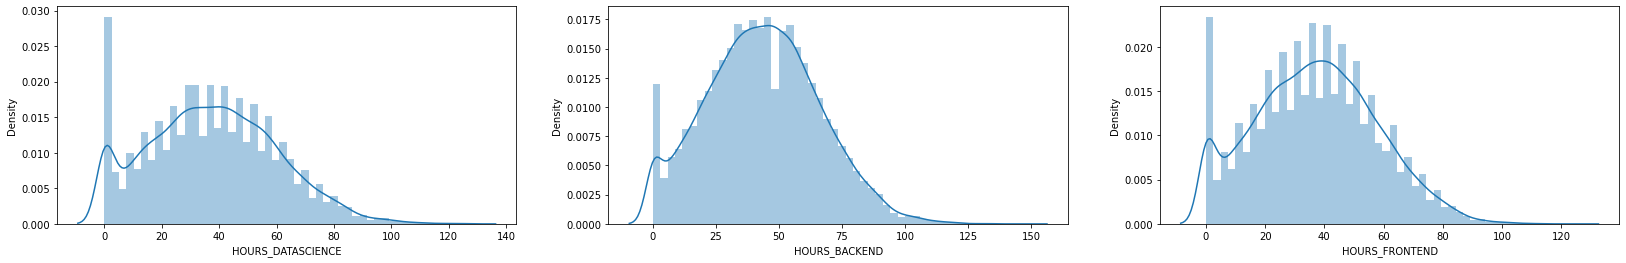

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_training_dataset['HOURS_DATASCIENCE'].dropna(), ax=axes[0])
sns.distplot(df_training_dataset['HOURS_BACKEND'].dropna(), ax=axes[1])
sns.distplot(df_training_dataset['HOURS_FRONTEND'].dropna(), ax=axes[2])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='NUM_COURSES_ADVANCED_FRONTEND', ylabel='Density'>

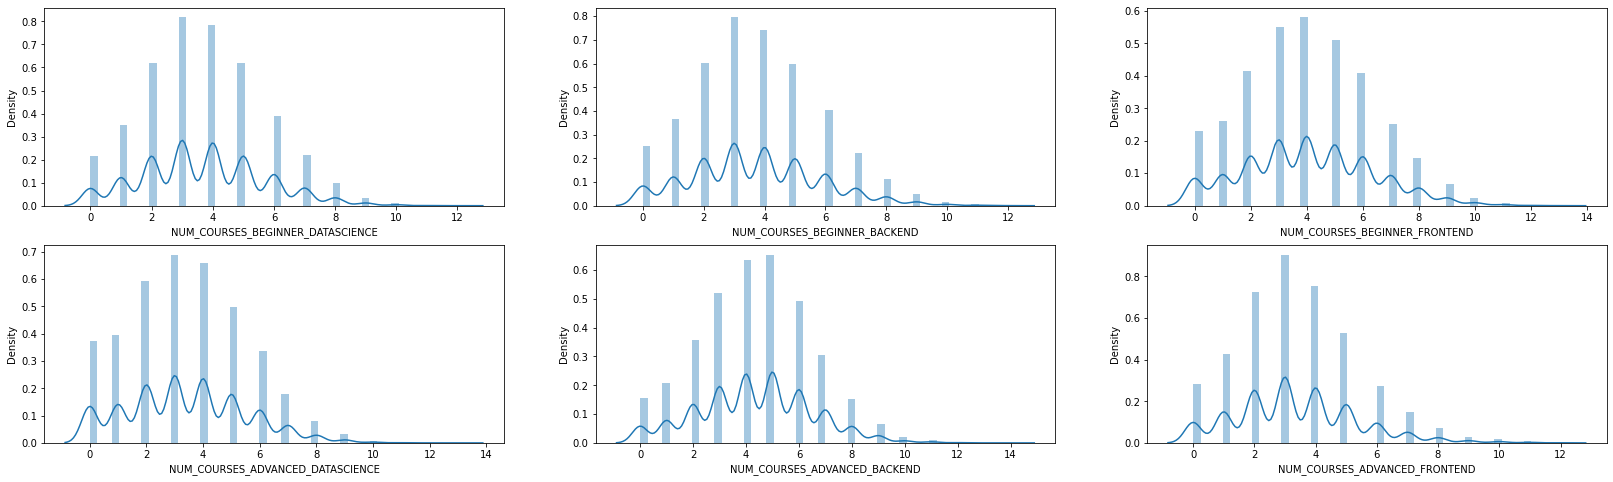

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 8))

sns.distplot(df_training_dataset['NUM_COURSES_BEGINNER_DATASCIENCE'].dropna(), ax=axes[0][0] )
sns.distplot(df_training_dataset['NUM_COURSES_BEGINNER_BACKEND'].dropna(), ax=axes[0][1] )
sns.distplot(df_training_dataset['NUM_COURSES_BEGINNER_FRONTEND'].dropna(), ax=axes[0][2])
sns.distplot(df_training_dataset['NUM_COURSES_ADVANCED_DATASCIENCE'].dropna(), ax=axes[1][0])
sns.distplot(df_training_dataset['NUM_COURSES_ADVANCED_BACKEND'].dropna(), ax=axes[1][1])
sns.distplot(df_training_dataset['NUM_COURSES_ADVANCED_FRONTEND'].dropna(), ax=axes[1][2])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='AVG_SCORE_FRONTEND', ylabel='Density'>

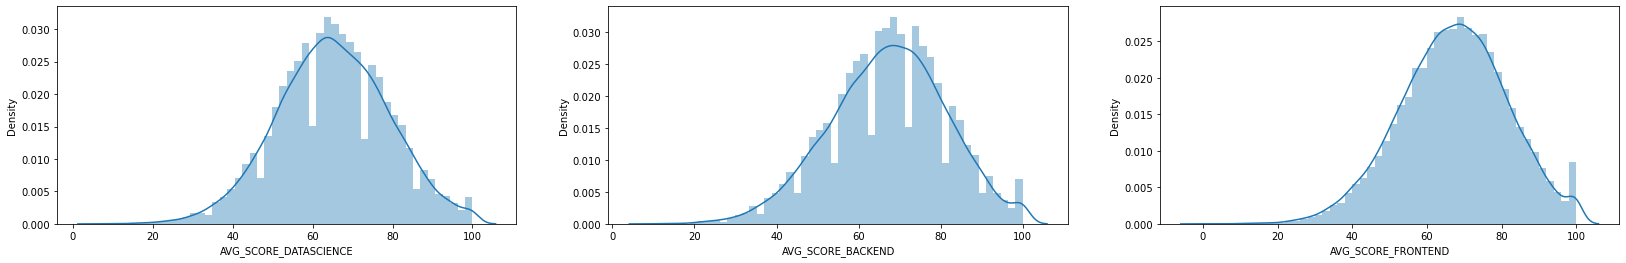

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_training_dataset['AVG_SCORE_DATASCIENCE'].dropna(), ax=axes[0])
sns.distplot(df_training_dataset['AVG_SCORE_BACKEND'].dropna(), ax=axes[1])
sns.distplot(df_training_dataset['AVG_SCORE_FRONTEND'].dropna(), ax=axes[2])

advanced_backend         3339
advanced_front_end       3337
beginner_front_end       3335
beginner_backend         3332
advanced_data_science    3330
beginner_data_science    3327
Name: PROFILE, dtype: int64

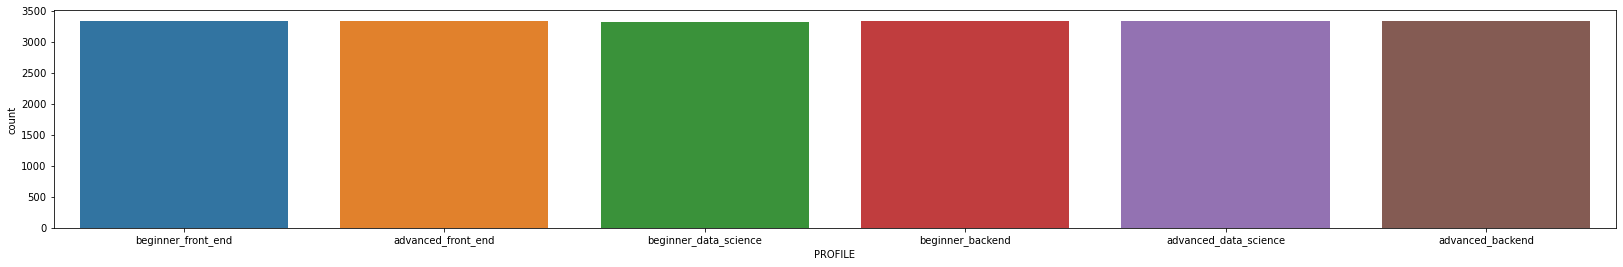

In [10]:
fig, axes = plt.subplots(figsize=(28, 4))

sns.countplot(ax=axes, x='PROFILE', data=df_training_dataset)
df_training_dataset['PROFILE'].value_counts()

# FEATURE ENGINEERING

## Drop columns

Podemos borrar datos que no vinculantes con las caracteristicas del alumno
* Unnamed: 0
* USER_ID
* NAME

In [11]:
df_train = df_training_dataset.drop(columns = [ 'Unnamed: 0', 'USER_ID','NAME' ])

# Filling Nan Values

Vamos a llenar nos valores perdidos, agrupando los datos según el profile y llenando los datos con la tecnica de SKITLEARN KNN, dentro de cada clase.

In [27]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict
from tqdm import tqdm

def fill_categorical_valuesUsingNumerical_rfc(data, aux_table, columns2fill, columnsBase_num,columnsBase_cat=None,max_depth=8):
    """
    columnsBase: es una lista de columnas numéricas
    columns2fill: es una lista de columnas categóricas
    aux_table: tabla sin nulos
    data: data a completar
    """
    aux_table = aux_table.reset_index(drop=True).copy()
    data = data.copy()
#     for ind , table in enumerate(data):
#         table['Genero'] = table['Genero'].replace('0', np.nan)
#         data[ind] = table
    models= defaultdict(list)
    
    encoder = OneHotEncoder(handle_unknown='ignore')
    def fill_nan_categorical(x, model,column,columnsBase_num,mean_values,columnsBase_cat,mode_values):
        if x[column] == x[column]: ## solo deben entrar los valores nulos
            return x[column] 
        valores2look = [x[col_name] if x[col_name] == x[col_name] else mean_values[col_name]  for col_name in columnsBase_num]
        #valores2look = valores2look
        valores2look = np.stack(valores2look).reshape(1, -1)
        #print(valores2look)
        return model.predict(valores2look )[0] 
    
    def fill_nan_categorical_catBase(x, model,column,columnsBase_num,mean_values,columnsBase_categ,mode_values,encoder):
        if x[column] == x[column]: ## solo deben entrar los valores nulos
            return x[column] 
        ## Tomando los valores númericos para la predicción
        #print(columnsBase_num)
        valores2look = []
        if len(columnsBase_num)>0:
            valores2look = [x[col_name] if x[col_name] == x[col_name] else mean_values[col_name]  for col_name in columnsBase_num]
        if len(columnsBase_categ)> 0:
            ## Tomando los valores categóricos para la predicción
            valores2look_cat = [x[col_name] if x[col_name] == x[col_name] else mode_values[col_name]  for col_name in columnsBase_categ]
            ##     Transformando con el encoder
            valores2look_cat = onehot_transfor(encoder, valores2look_cat)
            ############ SUMANDO LAS DOS LISTAS DE VALORES
            valores2look = valores2look + valores2look_cat
        #ADAPTANDO AL FORMATO DE ENTRADA DEL CLASIFICADOR
        valores2look = np.stack(valores2look).reshape(1, -1)
        #print(valores2look)
        value = model.predict(valores2look)[0]
        return value if type(value)== str else round(value) 
    
    def upsampling_classes(X, Y , column):
        df_train_umb = X.join(Y).copy()
        count4bal = df_train_umb[column].value_counts().sort_values(ascending=True)
        class_sorter = count4bal.index.tolist()[:-1]
        class_mayor = count4bal.index[-1]  ##  clase mayoritaria
        mayority_sample = count4bal[-1]  ## cantidad de muestras en la clase mayoritaria
        df_train_balanced = df_train_umb.loc[df_train_umb[column]==class_mayor]
        for class_i in class_sorter:
            df_minor_upsampled = resample(df_train_umb.loc[df_train_umb[column]==class_i], 
                                     replace=True,     # sample with replacement
                                     n_samples=mayority_sample,    # to match majority class
                                     random_state=17) # reproducible results
            df_train_balanced = pd.concat([df_train_balanced,df_minor_upsampled ],ignore_index=True)

        return df_train_balanced.drop(columns=[column]), df_train_balanced[column]
    
    def onehot_transfor(encoder, lista):
        output = encoder.transform(np.stack([lista[0]]).reshape(-1, 1)).toarray()
        if len(lista)>1:
            for cat in lista[1:]:
                output = output +  encoder.transform(np.stack([cat]).reshape(-1, 1)).toarray()
            return output[0].tolist()
        else:
            return output[0].tolist()
        
    def best_model(X, Y,column):
        #display(X.columns)
        if type(Y[0]) == object or type(Y[0]) == str:
            #X, Y = upsampling_classes(X, Y , column)
            clf_rfr = GridSearchCV(estimator=RandomForestClassifier(random_state=25, n_jobs=-1), 
                        param_grid=[{'n_estimators':[10,20,100,120],'criterion':['entropy','gini']}], # 'max_depth':[None,20], 
                        scoring='f1_macro', n_jobs=-1, cv=5)
            clf_rfr.fit(X,Y)
            print(clf_rfr.best_params_)########
            return clf_rfr
        else: 
            clf_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=25, n_jobs=-1), 
                        param_grid=[{ 'n_estimators':[100,120],'criterion':['mse','mae']}], #'max_depth':[None,],
                        scoring='r2', n_jobs=-1, cv=KFold(n_splits=5) )
            clf_rfr.fit(X,Y)
            print(clf_rfr.best_params_)########
            return clf_rfr
            
    ### MODO SOLO NUMÉRICO COMO BASE ####################################################
    columnsBase = columnsBase_num.copy() + columnsBase_cat.copy()
     ### LLENANDO VALORES USANDO EL CLASSIFICADOR ADD DOC
    mean_values = aux_table[columnsBase_num].mean()
    mode_values = aux_table[columnsBase_cat].mode() if columnsBase_cat else None
    for column in tqdm(columns2fill):
        if column in columnsBase:
            columnsBase_cat_ad = columnsBase_cat.copy()
            columnsBase_num_ad = columnsBase_num.copy()
            if column in columnsBase_cat:
                columnsBase_cat_ad.remove(column)
            if column in columnsBase_num:
                columnsBase_num_ad.remove(column)

            if len(columnsBase_cat_ad)>0:
                base_cat_list = np.stack([str(item)+str(ind)   for ind , column in enumerate(columnsBase_cat_ad) for item in np.unique(aux_table[column].to_numpy())]).reshape(-1, 1)
                ##print(base_cat_list)
                encoder.fit(base_cat_list)

            aux_column_set = columnsBase.copy()
            aux_column_set.remove(column)
            model = best_model(pd.get_dummies(aux_table[aux_column_set]),aux_table[column],column)
            ##print(pd.get_dummies(aux_table[aux_column_set]).columns.tolist())
            models[column] = model.best_score_
            ### RELLENANDO DATOS
            for ind, table in enumerate(data):
                table[column] = table.apply(fill_nan_categorical_catBase, args=(model,column,columnsBase_num_ad,mean_values,columnsBase_cat_ad,mode_values,encoder ), axis=1)
                data[ind] = table
        else:
            base_cat_list = np.stack([str(item)+str(ind)   for ind , column in enumerate(columnsBase_cat)    for item in np.unique(aux_table[column].to_numpy())]).reshape(-1, 1)
            #print(base_cat_list)
            encoder.fit(base_cat_list)
            model = best_model(pd.get_dummies(aux_table[columnsBase]),aux_table[column],column)
            #print(pd.get_dummies(aux_table[columnsBase]).columns.tolist())
            models[column] = model.best_score_
            #models[column] = model
            ### RELLENANDO DATOS
            for ind, table in enumerate(data):
                table[column] = table.apply(fill_nan_categorical_catBase, args=(model,column,columnsBase_num,mean_values,columnsBase_cat,mode_values,encoder ), axis=1)
                data[ind] = table
    display(models)
    return data[0], data[1]

In [25]:
df_temp_aux = df_train.dropna().reset_index(drop=True).copy()

In [15]:
df_train.isnull().sum()

HOURS_DATASCIENCE                    14
HOURS_BACKEND                        53
HOURS_FRONTEND                       16
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
PROFILE                               0
dtype: int64

In [28]:
columnsBase_num = ['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND' ]
columnsBase_cat = []
#columnsBase_num = []
columns2bfilled = df_train.columns.tolist()
# columns2bfilled.remove('Banca_movil_userfriendly')
# columns2bfilled.remove('Frecuencia_tarjeta_virtual_mes')
columns2bfilled.remove('PROFILE')
df_train_fill,df_test_fill = fill_categorical_valuesUsingNumerical_rfc(data = [df_train,df_to_be_scored], aux_table = df_temp_aux.copy(), 
                                                              columns2fill=columns2bfilled, columnsBase_num=columnsBase_num,
                                                              columnsBase_cat=columnsBase_cat )
df_train_fill.isnull().sum()

  0%|          | 0/12 [00:00<?, ?it/s]

{'criterion': 'mse', 'n_estimators': 120}


  8%|▊         | 1/12 [07:21<1:20:51, 441.05s/it]

{'criterion': 'mse', 'n_estimators': 120}


 17%|█▋        | 2/12 [14:17<1:12:17, 433.75s/it]

{'criterion': 'mse', 'n_estimators': 120}


 25%|██▌       | 3/12 [21:51<1:05:58, 439.81s/it]

{'criterion': 'mse', 'n_estimators': 120}


 33%|███▎      | 4/12 [31:38<1:04:31, 483.94s/it]

{'criterion': 'mse', 'n_estimators': 120}


 42%|████▏     | 5/12 [41:59<1:01:14, 524.95s/it]

{'criterion': 'mse', 'n_estimators': 120}


 50%|█████     | 6/12 [53:38<57:44, 577.34s/it]  

{'criterion': 'mse', 'n_estimators': 120}


 58%|█████▊    | 7/12 [1:07:49<54:56, 659.36s/it]

{'criterion': 'mse', 'n_estimators': 120}


 67%|██████▋   | 8/12 [1:18:36<43:42, 655.54s/it]

{'criterion': 'mse', 'n_estimators': 120}


 75%|███████▌  | 9/12 [1:43:05<44:58, 899.52s/it]

{'criterion': 'mse', 'n_estimators': 120}


 83%|████████▎ | 10/12 [1:50:10<25:14, 757.17s/it]

{'criterion': 'mse', 'n_estimators': 120}


 92%|█████████▏| 11/12 [1:56:46<10:48, 648.83s/it]

{'criterion': 'mse', 'n_estimators': 120}


100%|██████████| 12/12 [2:03:38<00:00, 618.17s/it]


defaultdict(list,
            {'HOURS_DATASCIENCE': 0.5264676002103592,
             'HOURS_BACKEND': 0.5022588406639505,
             'HOURS_FRONTEND': 0.46588743424935064,
             'NUM_COURSES_BEGINNER_DATASCIENCE': 0.4946582614048916,
             'NUM_COURSES_BEGINNER_BACKEND': 0.4853587204568207,
             'NUM_COURSES_BEGINNER_FRONTEND': 0.5351882733337554,
             'NUM_COURSES_ADVANCED_DATASCIENCE': 0.46814816961817096,
             'NUM_COURSES_ADVANCED_BACKEND': 0.46228923912954656,
             'NUM_COURSES_ADVANCED_FRONTEND': 0.47151636985835294,
             'AVG_SCORE_DATASCIENCE': 0.4872687359218387,
             'AVG_SCORE_BACKEND': 0.4928522542644564,
             'AVG_SCORE_FRONTEND': 0.5246642396768082})

HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
PROFILE                             0
dtype: int64

## Corrigiendo los datos de las columnas de valores enteros

In [30]:
#df_train_fill,df_test_fill 
columns_int = ['NUM_COURSES_BEGINNER_DATASCIENCE',
 'NUM_COURSES_BEGINNER_BACKEND',
 'NUM_COURSES_BEGINNER_FRONTEND',
 'NUM_COURSES_ADVANCED_DATASCIENCE',
 'NUM_COURSES_ADVANCED_BACKEND',
 'NUM_COURSES_ADVANCED_FRONTEND',]
df_train_fill[columns_int] = df_train_fill[columns_int].apply(lambda x: round(x,0)).astype(int)

# UPsampling Data
La diferencia entre clases no es muy alta pero por buenas prácticas, vamos a nivelar las clases para que los modelos no tengan preferencias por desbalance.

In [32]:
from sklearn.utils import resample
count4bal = df_train_fill['PROFILE'].value_counts().sort_values(ascending=True)
class_sorter = count4bal.index.tolist()[:-1]
class_mayor = count4bal.index[-1]
mayority_sample = count4bal[-1]
df_balanced = df_train_fill.loc[df_train_fill['PROFILE']==class_mayor]
for class_i in class_sorter:
    df_minor_upsampled = resample(df_train_fill.loc[df_train_fill['PROFILE']==class_i], 
                             replace=True,     # sample with replacement
                             n_samples=mayority_sample,    # to match majority class
                             random_state=17) # reproducible results

    df_balanced = pd.concat([df_balanced,df_minor_upsampled ],ignore_index=True)
df_balanced['PROFILE'].value_counts()

beginner_front_end       3339
advanced_front_end       3339
advanced_data_science    3339
beginner_data_science    3339
advanced_backend         3339
beginner_backend         3339
Name: PROFILE, dtype: int64

## Creando nuevas variables

Puedo extraer caracteristicas de los individuos:
* En dónde tiene su nota más alta
* Donde tiene la mayor cantidad de cursos
* Dónde tiene la mayor cantidad de horas <br>
===> Horas/curso = Cantidad de horas_mayor / Candidad de cursos_mayor <br>
===> Área de mayor nota         = MAX avg note

* Creando la caracteristica | CANTIDAD DE CURSOS X3 | Horas/Especialidad X 3 | Eficiencia_en_especialidad X3

In [33]:
def add_new_features(data):
    def horasxarea(x):
        total_backend = x['NUM_COURSES_BEGINNER_BACKEND'] + x['NUM_COURSES_ADVANCED_BACKEND'] 
        total_ds      = x['NUM_COURSES_BEGINNER_DATASCIENCE'] + x['NUM_COURSES_ADVANCED_DATASCIENCE']
        total_frontend= x['NUM_COURSES_ADVANCED_FRONTEND'] + x['NUM_COURSES_BEGINNER_FRONTEND']

        HR_A_DS = round(x['HOURS_DATASCIENCE']/total_ds) if total_ds != 0 else 0
        HR_A_BE = round(x['HOURS_BACKEND']/total_backend) if total_backend != 0 else 0
        HR_A_FE = round(x['HOURS_FRONTEND']/total_frontend)if total_frontend != 0 else 0

        SCORE_HR_A_DS =round( x['AVG_SCORE_DATASCIENCE']/HR_A_DS )if HR_A_DS !=0 else 0
        SCORE_HR_A_BE = round(x['AVG_SCORE_BACKEND']/HR_A_BE )    if HR_A_BE !=0 else 0
        SCORE_HR_A_FE = round(x['AVG_SCORE_FRONTEND']/HR_A_FE )   if HR_A_FE !=0 else 0

        return pd.Series([total_backend,total_ds,total_frontend,HR_A_DS, HR_A_BE, HR_A_FE,SCORE_HR_A_DS,SCORE_HR_A_BE,SCORE_HR_A_FE], index = ['NUM_CURS_BE','NUM_CURS_DS', 'NUM_CURS_FE', 'HR_A_DS', 'HR_A_BE', 'HR_A_FE','SCORE_HR_A_DS','SCORE_HR_A_BE','SCORE_HR_A_FE'])

    return data.join(data.apply(horasxarea, axis=1))
    
df_balanced_improve =  add_new_features(df_balanced.copy())
df_balanced_improve.describe()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,...,AVG_SCORE_FRONTEND,NUM_CURS_BE,NUM_CURS_DS,NUM_CURS_FE,HR_A_DS,HR_A_BE,HR_A_FE,SCORE_HR_A_DS,SCORE_HR_A_BE,SCORE_HR_A_FE
count,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,...,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000
mean,37.602426,43.763552,36.671209,3.703205,3.704902,4.047869,3.379455,4.333433,3.374763,64.973745,...,66.999002,8.038335,7.082659,7.422632,6.538734,6.845762,6.401567,14.955276,15.221823,16.617600
std,22.275811,22.242494,20.553358,1.991712,2.109674,2.289782,2.104486,2.175712,1.990948,14.004988,...,14.446658,3.112738,3.011129,3.235006,6.611550,6.900363,6.727974,16.133983,14.067799,16.551783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,28.000000,22.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,56.000000,...,57.000000,6.000000,5.000000,5.000000,3.000000,3.000000,3.000000,6.000000,7.000000,6.000000
50%,37.000000,43.000000,37.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,65.000000,...,67.000000,8.000000,7.000000,7.000000,5.000000,5.000000,5.000000,10.000000,11.000000,12.000000
75%,53.000000,59.000000,51.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,75.000000,...,77.000000,10.000000,9.000000,9.000000,8.000000,8.000000,8.000000,18.000000,18.000000,21.000000
max,124.000000,147.000000,124.000000,12.000000,12.000000,13.000000,13.000000,14.000000,12.000000,100.000000,...,100.000000,19.000000,18.000000,22.000000,90.000000,105.000000,85.000000,100.000000,100.000000,100.000000


In [34]:
df_balanced_improve.groupby(['PROFILE']).mean()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,...,AVG_SCORE_FRONTEND,NUM_CURS_BE,NUM_CURS_DS,NUM_CURS_FE,HR_A_DS,HR_A_BE,HR_A_FE,SCORE_HR_A_DS,SCORE_HR_A_BE,SCORE_HR_A_FE
PROFILE,,,,,,,,,,,,,,,,,,,,,
advanced_backend,32.374064,49.545373,29.995508,4.973046,3.042528,4.993411,4.956873,3.102126,5.066187,71.583708,...,71.047020,6.144654,9.929919,10.059599,3.669362,10.678646,3.547469,23.452531,11.828691,24.869721
advanced_data_science,49.762504,49.368973,30.230308,5.013777,3.009584,5.025756,3.014675,5.005091,2.957772,58.631626,...,71.165618,8.014675,8.028452,7.983528,7.016472,7.211740,4.718778,10.598083,11.633124,21.571129
advanced_front_end,31.092842,50.791554,49.672656,3.023360,4.996706,3.156035,3.085654,4.973645,2.991614,58.832285,...,58.030548,9.970350,6.109015,6.147649,6.063492,5.160527,10.169811,14.103923,17.200060,8.130578
beginner_backend,32.108416,51.171908,30.186882,3.120695,3.043426,2.980533,3.100928,4.998503,3.083857,70.708895,...,71.379455,8.041929,6.221623,6.064391,5.764900,8.621144,6.764900,15.654987,13.888589,15.669362
beginner_data_science,30.625936,30.731357,49.778377,3.073974,3.076670,5.037436,3.068583,2.993112,3.028152,58.643007,...,71.795448,6.069781,6.142558,8.065588,6.222522,5.955076,6.813118,14.083258,16.693920,14.982929
beginner_front_end,49.650794,30.972147,30.163522,3.014376,5.060497,3.094040,3.050015,4.928122,3.120994,71.442947,...,58.575921,9.988619,6.064391,6.215034,10.495657,3.447439,6.395328,11.838874,20.086553,14.481881


# Graficando las variables saneadas

# CORR MATRIX - de una sola clase [aleatoria]


# Reducción de dimensionalidad [n_components selection]

Implementaremos el KNN para reducción de dimensionalidad, dada la naturaleza multiclase del problema es más conveniente esta alternativa, manteniendo los parámetros por default

*Resultados*
La reducción de dimensionalidad no resulta util para este studio del caso, el modelo lineal no logra mejorar la puntuación 

## Scaling data
Utilizaremo sel minMax Scaler para colocar algunas caracteristicas dentro del rango de 0-1

In [37]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
n_components = 12 #n_components
scaler = StandardScaler()#MinMaxScaler()
# scaler.fit(df_nca[[i for i in range(n_components)]])
# df_nca[[i for i in range(n_components)]] = scaler.transform(df_nca[[i for i in range(n_components)]])
# df_nca.head()
columns = df_balanced_improve.columns.tolist()
columns.remove('PROFILE')

scaler.fit(df_balanced_improve.drop(columns=['PROFILE']))
df_balanced_improve[columns] = scaler.transform(df_balanced_improve[columns])
df_balanced_improve.head()

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,...,PROFILE,NUM_CURS_BE,NUM_CURS_DS,NUM_CURS_FE,HR_A_DS,HR_A_BE,HR_A_FE,SCORE_HR_A_DS,SCORE_HR_A_BE,SCORE_HR_A_FE
0,-0.027045,0.595112,-0.421898,0.651112,-0.334137,0.415828,0.294875,-1.532150,0.314048,1.072948,...,advanced_backend,-1.297390,0.636767,0.487606,-0.383994,1.036817,-0.505598,0.312685,-0.726630,0.385612
1,-0.969795,0.729992,0.843133,0.149019,-0.808155,-0.020906,1.720437,0.766006,1.820905,-0.355150,...,advanced_backend,-0.012316,1.300987,1.105858,-0.837757,0.167276,-0.208325,2.791986,-0.442285,-0.037314
2,-0.251509,0.909833,0.648513,0.149019,-1.756193,1.726029,0.294875,-1.991781,3.327763,2.501047,...,advanced_backend,-2.582464,0.304658,3.269742,-0.383994,-0.992112,-0.505598,0.622597,-1.082060,0.506447
3,-1.014688,0.460232,-0.032658,0.651112,-0.334137,1.289295,0.770062,0.306375,0.314048,-0.140935,...,advanced_backend,-0.012316,0.968877,1.105858,-0.686503,0.022353,-0.505598,1.056475,-0.300113,0.264776
4,-0.924902,-0.214170,-1.103069,0.651112,-0.334137,0.415828,1.245250,-0.153256,0.816334,0.216090,...,advanced_backend,-0.333584,1.300987,0.796732,-0.686503,-0.122571,-0.802872,1.180440,-0.157941,2.681494


# Class to Transform DATA

In [39]:
class raw2test():
    def __init__(self, columns_int, scaler, auggfunc):
        self.columns_int = columns_int
        self.scaler = scaler
        self.auggfunc = auggfunc
        
    def transform(self, X):
        X = X.drop(columns = [ 'Unnamed: 0', 'USER_ID','NAME' ])
        columns = X.columns.tolist()
        #X[columns] = self.knn_imputer.transform(X) 
        X[self.columns_int] = X[self.columns_int].apply(lambda x: round(x,0)).astype(int)
        X = self.auggfunc(X)
        X = self.scaler.transform(X)
        return X       #test_knn_imputer
pretest = raw2test(columns_int =columns_int, scaler =  scaler,auggfunc=add_new_features)

# MODEL TIME

In [42]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV,StratifiedKFold
#from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score,confusion_matrix
#from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.decomposition import PCA
#from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
from sklearn.neighbors import KNeighborsClassifier as KNC
from collections import defaultdict
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
best_parameters = defaultdict(list) # 'xgb': XGBClassifier(),
classifiers = defaultdict(list) # 'xgb': XGBClassifier(), X_train_whole,y_train_whole
X_train_whole       = df_balanced_improve.drop(columns=['PROFILE']).to_numpy()
y_train_whole       = df_balanced_improve['PROFILE']

X_train, X_test, y_train, y_test = train_test_split(X_train_whole,y_train_whole, stratify = y_train_whole, random_state= 17,test_size = 0.2 )


In [43]:
##NOTA:
# El metodo df_catdumm (cat+PCA+scalar) no sirve, entrega un pesimo rendimiento        F1 = 0.64
# EL metodo df_cat (usar bandas -10 para agrupar valores) entregó un rendimiento medio F1=0.81
# EL método df_balanced entregó un rendimiento de F1 = 0.93
# X_train       = df_balanced.drop(columns=['PROFILE'])
# y_train       = df_balanced['PROFILE']


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
# Parameters to tune
# SVC
tuned_parameters_svc = [{'penalty': ['l2','l1'], 'loss': ['squared_hinge','hinge'],'C': [0.1,1.0,10,100], 'max_iter': [4000], 'random_state':[15], 'dual':[False]}]
# XGB
tuned_parameters_xgb = [{'learning_rate':[0.2,0.3,0.4,0.5],'n_estimators':[140,160,180,220,250,300],'min_child_weight':[.01],'subsample':[.4,.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'objective':['multi:softmax','binary:logistic'],'n_jobs':[-1],'random_state':[15] }]

#KNC
tuned_parameters_knc = [{'n_neighbors':[2,4,6,8,10,12,14,16],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}]

#RFC
tuned_parameters_rfc = [{'n_estimators':[100,120,140,180],'criterion':['gini','entropy'],'min_samples_split':[2,3,4,5],'n_jobs':[-1],'random_state':[15]}]

#GBC
tuned_parameters_gbc = [{'loss':['deviance','exponential'],'learning_rate':[0.1,0.2,0.3,0.4],'n_estimators':[160,190,220,250,270],'subsample':[1.0],'criterion':[ 'mse', 'friedman_mse'],'max_depth':[3,8,10],'random_state':[15]}]

#ETC
tuned_parameters_etc = [{ 'min_samples_split':[.2,.4,.8], 'n_estimators':[80,120,150,180,200,250],'warm_start':[True],'bootstrap':[True],
                         'n_jobs':[-1], 'random_state':[15], 'min_samples_leaf':[3,4,5,6] ,'criterion':['gini', 'entropy'],'max_features':[ 'sqrt']   }]

#LR
tuned_parameters_lr = [{'C':[0.1,1.0,10.0], 'dual':[False], 'solver':['newton-cg', 'saga','sag'],'multi_class':['ovr', 'multinomial']}]

# Parameter tunning
scores = ['f1']

# Best parameters
#  'lr': LR(random_state=17), 'svc':LinearSVC(), 'knc': KNC(),
models = { 'xgb': XGBClassifier(),  'rfc':RandomForestClassifier(), 'etc':ExtraTreesClassifier() ,'gbc':GradientBoostingClassifier() }
parameters = {'lr':tuned_parameters_lr, 'xgb': tuned_parameters_xgb, 'knc': tuned_parameters_knc,'rfc':tuned_parameters_rfc,'svc':tuned_parameters_svc, 'gbc':tuned_parameters_gbc, 'etc':tuned_parameters_etc }

#;ista = ['etc']
for model_name in models.keys():
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        clf_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s_macro' % score, n_jobs=-1, cv=skf)
        clf_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf_i.best_params_)
        best_parameters[model_name] = clf_i.best_params_
        classifiers[model_name] = clf_i
        print("Grid scores on development set:")
        print()
        means = clf_i.cv_results_['mean_test_score']
        stds = clf_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        print()
        y_true, y_pred = y_test, clf_i.predict(X_test)
        print(classification_report(y_true, y_pred, digits=4 ))

######### MODEL tunning hyper-parameters for xgb
# xgb - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{'colsample_bytree': 1.0, 'learning_rate': 0.4, 'min_child_weight': 0.01, 'n_estimators': 300, 'n_jobs': -1, 'objective': 'multi:softmax', 'random_state': 15, 'subsample': 0.8}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.9621650729263511

                       precision    recall  f1-score   support

     advanced_backend     0.9725    0.9536    0.9630       668
advanced_data_science     0.9602    0.9746    0.9673       668
   advanced_front_end     0.9747    0.9805    0.9776       667
     beginner_backend     0.9816    0.9581    0.9697       668
beginner_data_science     0.9790    0.9775    0.9783       668
   beginner_front_end     0.9635    0.9865    0.9749       668

             accuracy                         0.9718      4007
         

######### MODEL tunning hyper-parameters for svc
# svc - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 4000, 'penalty': 'l2', 'random_state': 15}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.7093171022571829

                       precision    recall  f1-score   support

     advanced_backend     0.7702    0.7425    0.7561       668
advanced_data_science     0.6870    0.6737    0.6803       668
   advanced_front_end     0.7447    0.7871    0.7653       667
     beginner_backend     0.6903    0.5240    0.5957       668
beginner_data_science     0.7407    0.7740    0.7570       668
   beginner_front_end     0.6967    0.8323    0.7585       668

             accuracy                         0.7222      4007
            macro avg     0.7216    0.7223    0.7188      4007
         weighted

######### MODEL tunning hyper-parameters for knc
# knc - Tuning hyper-parameters for f1 ###############################################################


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters set found on development set:

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 12, 'p': 2}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.9121530397759672

                       precision    recall  f1-score   support

     advanced_backend     0.9293    0.9251    0.9272       668
advanced_data_science     0.8971    0.9132    0.9050       668
   advanced_front_end     0.8982    0.9520    0.9243       667
     beginner_backend     0.9342    0.8713    0.9016       668
beginner_data_science     0.9352    0.9296    0.9324       668
   beginner_front_end     0.9341    0.9341    0.9341       668

             accuracy                         0.9209      4007
            macro avg     0.9214    0.9209    0.9208      4007
         weighted avg     0.9214    0.9209    0.9208      4007



######### MODEL tunning hyper-parameters for lr
# lr - Tuning hyper-parameters for f1 ###############################################################
Best parameters set found on development set:

{'C': 1.0, 'dual': False, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Grid scores on development set:

Detailed classification report:
CV - Results max score: 0.7132201368215905

                       precision    recall  f1-score   support

     advanced_backend     0.7859    0.7365    0.7604       668
advanced_data_science     0.6882    0.6707    0.6793       668
   advanced_front_end     0.7432    0.7811    0.7617       667
     beginner_backend     0.6543    0.5808    0.6154       668
beginner_data_science     0.7588    0.7769    0.7678       668
   beginner_front_end     0.7141    0.8039    0.7563       668

             accuracy                         0.7250      4007
            macro avg     0.7241    0.7250    0.7235      4007
         weighted avg     0.7241    0.7250    

In [55]:
best_parameters = defaultdict(list,
            {'xgb': {'colsample_bytree': 1.0,
              'learning_rate': 0.4,
              'min_child_weight': 0.01,
              'n_estimators': 300,
              'n_jobs': -1,
              'objective': 'multi:softmax',
              'random_state': 15,
              'subsample': 0.8},
             'rfc': {'criterion': 'gini',
              'min_samples_split': 2,
              'n_estimators': 140,
              'n_jobs': -1,
              'random_state': 15},
             'etc': {'bootstrap': True,
              'criterion': 'gini',
              'max_features': 'sqrt',
              'min_samples_leaf': 3,
              'min_samples_split': 0.2,
              'n_estimators': 250,
              'n_jobs': -1,
              'random_state': 15,
              'warm_start': True},
             'gbc': {'criterion': 'friedman_mse',
              'learning_rate': 0.4,
              'loss': 'deviance',
              'max_depth': 8,
              'n_estimators': 160,
              'random_state': 15,
              'subsample': 1.0},
             'knc': {'algorithm': 'auto',
              'n_jobs': -1,
              'n_neighbors': 12,
              'p': 2},
             'svc': {'C': 0.1,
              'dual': False,
              'loss': 'squared_hinge',
              'max_iter': 4000,
              'penalty': 'l2',
              'random_state': 15},
             'lr': {'C': 1.0,
              'dual': False,
              'multi_class': 'multinomial',
              'solver': 'newton-cg'}})

## Bagging Classifier MODEL - GRIDSEARCH + CV

In [56]:
clf_gbc = GradientBoostingClassifier(**best_parameters['gbc'] )#n_estimators=80, n_jobs=-1)# 20 - 80
clf_RFC = RandomForestClassifier(**best_parameters['rfc'] )#
clf_KNC = KNC(**best_parameters['knc'] )
xgb_model = XGBClassifier(**best_parameters['xgb'])
svc = LinearSVC(**best_parameters['svc'])
#etc = ExtraTreesClassifier(**best_parameters['etc'])
#lr  = LR(**best_parameters['lr'])

models = {'knc': clf_KNC,'svc': svc}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
# Parameter tunning
scores = ['f1']
# Best parameters
best_parameters_bagging = defaultdict(list)
#lista = ['etc']
for model_name in models.keys():
    params_bagging = [{'n_estimators': [50,100], 'max_samples':[1.0],'base_estimator': [models[model_name]],'n_jobs':[-1] }]
    print("######### Bagging MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s #########################################################" % (model_name, score))
        clf_i = GridSearchCV(BaggingClassifier(), params_bagging, scoring='%s_macro' % score, n_jobs=-1, cv=skf)
        clf_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf_i.best_params_)
        best_parameters_bagging[model_name] = clf_i.best_params_
        print("Grid scores on development set:")
        print()
        means = clf_i.cv_results_['mean_test_score']
        stds = clf_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Bagging classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        print()
        y_true, y_pred = y_test, clf_i.predict(X_test)
        print(classification_report(y_true, y_pred, digits=4))

######### Bagging MODEL tunning hyper-parameters for knc
# knc - Tuning hyper-parameters for f1 #########################################################
Best parameters set found on development set:

{'base_estimator': KNeighborsClassifier(n_jobs=-1, n_neighbors=12), 'max_samples': 1.0, 'n_estimators': 50, 'n_jobs': -1}
Grid scores on development set:

Detailed Bagging classification report:
CV - Results max score: 0.9150954713221925

                       precision    recall  f1-score   support

     advanced_backend     0.9429    0.9147    0.9286       668
advanced_data_science     0.9068    0.9177    0.9122       668
   advanced_front_end     0.9066    0.9610    0.9330       667
     beginner_backend     0.9285    0.8743    0.9005       668
beginner_data_science     0.9358    0.9386    0.9372       668
   beginner_front_end     0.9276    0.9401    0.9338       668

             accuracy                         0.9244      4007
            macro avg     0.9247    0.9244    0.9242  

In [58]:
best_parameters_bagging = defaultdict(list,
            {'knc': {'base_estimator': KNC(**best_parameters['knc']),
              'max_samples': 1.0,
              'n_estimators': 50,
              'n_jobs': -1},})

# Improved Models

Dependiendo de los resultados del bagging debemos elegir si quedarnos o no el modelo en bagging

In [59]:
xgb_f = XGBClassifier(**best_parameters['xgb'])
KNC_f = BaggingClassifier( **best_parameters_bagging['knc'] )
RFC_f = RandomForestClassifier(**best_parameters['rfc'] )
svc_f = LinearSVC( **best_parameters['svc'] )
gbc_f = GradientBoostingClassifier(**best_parameters['gbc'] )
etc_f = ExtraTreesClassifier(**best_parameters['etc'])
lr_f  = LR( **best_parameters['lr'] )

# Voting Classifier Model + GridSerch

In [47]:
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score #( X_train_PCA , label)
from sklearn.metrics import f1_score
# Ir retirnando los modelos más deviles progresivamente
estimators0= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('svc',svc_f),('gbc',gbc_f),('etc',etc_f),('lr', lr_f)]
estimators1= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f),('etc',etc_f),('lr', lr_f)]
estimators2= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f),('etc',etc_f)]
estimators3= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f)] # **** ganador 
estimators4= [ ('xgb', xgb_f),('rfc',RFC_f),('gbc',gbc_f)] 
estimators5= [ ('rfc',RFC_f),('gbc',gbc_f)]

estimators = [ estimators0,estimators1,estimators2,estimators3,estimators4,estimators5]
voting = ['hard','soft']

params_voting = [{'voting':voting,'n_jobs':[-1] }] # 'estimators': estimators, 

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
# Parameter tunning
scores = ['f1']
# Best parameters
best_parameters_voting = defaultdict(list)
# Scores
score_f1 = []

print("######### Voting MODEL tunning hyper-parameters for %s" % model_name)
for ind , set_estimator in enumerate(estimators):
    model_vc_i = VotingClassifier(estimators = set_estimator)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s #############################################################" % ('Voting', score))
        clf_i = GridSearchCV(model_vc_i, params_voting, scoring='%s_macro' % score, n_jobs=-1, cv=skf)
        clf_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf_i.best_params_)
        best_parameters_voting['set'+str(ind)] = clf_i.best_params_
        print("Grid scores on development set:")
        print()
        means = clf_i.cv_results_['mean_test_score']
        stds = clf_i.cv_results_['std_test_score']
    #         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
    #             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Bagging classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        score_f1.append(np.nan_to_num( means).max())
        best_parameters_voting['scores'] = score_f1
        print()
        y_true, y_pred = y_test, clf_i.predict(X_test)
        print(classification_report(y_true, y_pred, digits=4))

######### Voting MODEL tunning hyper-parameters for knc
# Voting - Tuning hyper-parameters for f1 #############################################################
Best parameters set found on development set:

{'n_jobs': -1, 'voting': 'soft'}
Grid scores on development set:

Detailed Bagging classification report:
CV - Results max score: 0.9038672181286662

                       precision    recall  f1-score   support

     advanced_backend     0.9419    0.8875    0.9139      2337
advanced_data_science     0.8999    0.9187    0.9092      2338
   advanced_front_end     0.9197    0.9405    0.9300      2337
     beginner_backend     0.9272    0.8935    0.9100      2337
beginner_data_science     0.9326    0.9414    0.9370      2337
   beginner_front_end     0.9170    0.9547    0.9355      2338

             accuracy                         0.9227     14024
            macro avg     0.9230    0.9227    0.9226     14024
         weighted avg     0.9230    0.9227    0.9226     14024

# Voting -

* Testing - Entrenando con el 80% de los datos

In [60]:
estimators3= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f)] # **** ganador 
## X_train, X_test, y_train, y_test
model_VC = VotingClassifier (estimators = estimators3, voting='hard',n_jobs=-1) ## editar
model_VC.fit(X_train,y_train)
y_true , y_pred =y_test,  model_VC.predict(X_test)

print("Detailed Voting classification report:")
print(classification_report(y_true, y_pred, digits=4))
#plot_confusion_matrix(y_true=y_train_whole, y_pred=y_pred, class_names=np.unique(y_pred),title="VotingClassifier",normalize=True,size=5)

Detailed Voting classification report:
                       precision    recall  f1-score   support

     advanced_backend     0.9683    0.9596    0.9639       668
advanced_data_science     0.9545    0.9731    0.9637       668
   advanced_front_end     0.9631    0.9790    0.9710       667
     beginner_backend     0.9891    0.9476    0.9679       668
beginner_data_science     0.9776    0.9790    0.9783       668
   beginner_front_end     0.9719    0.9850    0.9784       668

             accuracy                         0.9706      4007
            macro avg     0.9707    0.9706    0.9705      4007
         weighted avg     0.9707    0.9706    0.9705      4007



## STACKING CLASSIFIER + GRIDSEARCH ESTIMADORES

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()
# Stratify Kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
skf1 = StratifiedKFold(n_splits=4, shuffle=True, random_state=15)
skf2 = StratifiedKFold(n_splits=8, shuffle=True, random_state=15)
skf3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=15)

# Ir retirnando los modelos más deviles progresivamente
estimators0= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('svc',svc_f),('gbc',gbc_f),('etc',etc_f),('lr', lr_f)]
estimators1= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f),('etc',etc_f),('lr', lr_f)]  # **** Winner
estimators2= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f),('etc',etc_f)]
estimators3= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f)]
estimators4= [ ('xgb', xgb_f),('rfc',RFC_f),('gbc',gbc_f)]  
estimators5= [ ('rfc',RFC_f),('gbc',gbc_f)]

## Parámetro ganador
##params_winer = {'cv': StratifiedKFold(n_splits=8, random_state=15, shuffle=True), 'final_estimator': SVC(), 'n_jobs': -1}

estimators = [ estimators0,estimators1,estimators2,estimators3,estimators4,estimators5]
skf_method = [skf,skf1,skf2,skf3]

params_sc = [{'cv':skf_method,'n_jobs':[-1], 'final_estimator':[ LR(random_state=17),LinearSVC(random_state=17)] }] # 'estimators': estimators, 

# Parameter tunning
scores = ['f1']
# Best parameters
best_parameters_sc = defaultdict(list)
# Scores
score_sc_f1 = []

print("######### Stacking MODEL tunning hyper-parameters" )
for ind , set_estimator in enumerate(estimators):
    model_sc_i = StackingClassifier(estimators = set_estimator)
    for score in scores:
        print("# %s - %s Tuning hyper-parameters for %s #############################################################" % ('Stacking',ind, score))
        clf_i = GridSearchCV(model_sc_i, params_sc, scoring='%s_macro' % score, n_jobs=-1, cv=skf)
        clf_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(clf_i.best_params_)
        best_parameters_sc['set'+str(ind)] = clf_i.best_params_
        print("Grid scores on development set:")
        print()
        means = clf_i.cv_results_['mean_test_score']
        stds = clf_i.cv_results_['std_test_score']
    #         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
    #             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Staking classification report:")
        print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
        score_sc_f1.append(np.nan_to_num( means).max())
        best_parameters_sc['scores'] = score_sc_f1
        print()
        y_true, y_pred = y_test, clf_i.predict(X_test)
        print(classification_report(y_true, y_pred, digits=4))

######### Stacking MODEL tunning hyper-parameters
# Stacking - 0 Tuning hyper-parameters for f1 #############################################################


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best parameters set found on development set:

{'cv': StratifiedKFold(n_splits=4, random_state=15, shuffle=True), 'final_estimator': LogisticRegression(random_state=17), 'n_jobs': -1}
Grid scores on development set:

Detailed Staking classification report:
CV - Results max score: 0.963927138722017

                       precision    recall  f1-score   support

     advanced_backend     0.9742    0.9596    0.9668       668
advanced_data_science     0.9588    0.9760    0.9674       668
   advanced_front_end     0.9746    0.9760    0.9753       667
     beginner_backend     0.9861    0.9566    0.9711       668
beginner_data_science     0.9762    0.9805    0.9783       668
   beginner_front_end     0.9677    0.9880    0.9778       668

             accuracy                         0.9728      4007
            macro avg     0.9729    0.9728    0.9728      4007
         weighted avg     0.9729    0.9728    0.9728      4007

# Stacking - 1 Tuning hyper-parameters for f1 #####################

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best parameters set found on development set:

{'cv': StratifiedKFold(n_splits=5, random_state=15, shuffle=True), 'final_estimator': LogisticRegression(random_state=17), 'n_jobs': -1}
Grid scores on development set:

Detailed Staking classification report:
CV - Results max score: 0.9644892246709276

                       precision    recall  f1-score   support

     advanced_backend     0.9742    0.9611    0.9676       668
advanced_data_science     0.9602    0.9760    0.9681       668
   advanced_front_end     0.9775    0.9760    0.9767       667
     beginner_backend     0.9846    0.9581    0.9712       668
beginner_data_science     0.9762    0.9820    0.9791       668
   beginner_front_end     0.9692    0.9880    0.9785       668

             accuracy                         0.9735      4007
            macro avg     0.9736    0.9735    0.9735      4007
         weighted avg     0.9736    0.9735    0.9735      4007

# Stacking - 2 Tuning hyper-parameters for f1 ####################

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameters set found on development set:

{'cv': StratifiedKFold(n_splits=8, random_state=15, shuffle=True), 'final_estimator': LinearSVC(random_state=17), 'n_jobs': -1}
Grid scores on development set:

Detailed Staking classification report:
CV - Results max score: 0.9634146975238131

                       precision    recall  f1-score   support

     advanced_backend     0.9742    0.9611    0.9676       668
advanced_data_science     0.9630    0.9746    0.9688       668
   advanced_front_end     0.9776    0.9805    0.9790       667
     beginner_backend     0.9861    0.9581    0.9719       668
beginner_data_science     0.9776    0.9820    0.9798       668
   beginner_front_end     0.9678    0.9895    0.9785       668

             accuracy                         0.9743      4007
            macro avg     0.9744    0.9743    0.9743      4007
         weighted avg     0.9744    0.9743    0.9743      4007

# Stacking - 3 Tuning hyper-parameters for f1 #############################

# Stacking Classifier - GridSearch final_estimator

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score #( X_train_PCA , label)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# Stratify Kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
skf1 = StratifiedKFold(n_splits=4, shuffle=True, random_state=15)
skf2 = StratifiedKFold(n_splits=8, shuffle=True, random_state=15)
skf3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=15)
skf_method = [skf,skf2]
estimators1= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f),('etc',etc_f),('lr', lr_f)]  # **** Winner
model_SC = StackingClassifier (estimators=estimators1 , final_estimator = LogisticRegression(random_state=17) )

params_SC = {'final_estimator__C': [0.1,1.0, 10.0], 'final_estimator__solver': [ 'sag', 'saga','newton-cg' ], 'final_estimator__max_iter':[200], 'cv': skf_method,'n_jobs':[-1], }

# Parameter tunning
scores = ['f1']
# Best parameters
best_parameters_SC_final_estim = defaultdict(list)
#lista = ['etc']
for score in scores:
    print("# %s - Tuning hyper-parameters for %s" % ('Stacking Classifier', score))
    clf_i = GridSearchCV(estimator=model_SC, 
                    param_grid=params_SC, 
                    scoring='%s_macro' % score, n_jobs=-1, cv=skf)

    clf_i.fit(X_train,y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf_i.best_params_)
    best_parameters_SC_final_estim['SC'] = clf_i.best_params_
    print("Grid scores on development set:")
    print()
    means = clf_i.cv_results_['mean_test_score']
    stds = clf_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
    print("Detailed Staking classification report:")
    print("CV - Results max score: {}".format(np.nan_to_num( means).max()))
    score_sc_f1.append(np.nan_to_num( means).max())
    best_parameters_sc['scores'] = score_sc_f1
    print()
    y_true, y_pred = y_test, clf_i.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

# Stacking Classifier - Tuning hyper-parameters for f1


/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


* Stacking classifier Testing - Entrenando con el 80% de los datos

In [69]:
estimators1= [ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('gbc',gbc_f),('etc',etc_f),('lr', lr_f)]  # **** XGB optimizado + GBC optimizado

model_sc = StackingClassifier(estimators = estimators1, final_estimator = LR(C=10.0, max_iter=200,solver = 'newton-cg', random_state=17), cv = StratifiedKFold(n_splits=5, random_state=15, shuffle=True), n_jobs=-1)
model_sc.fit(X_train,y_train)
y_true, y_pred = y_test, model_sc.predict(X_test) ## improve 0.9723 from 0.9698 from 0.9693
print("Detailed Staking classification report:") 
print(classification_report(y_true, y_pred, digits=4))

Detailed Staking classification report:
                       precision    recall  f1-score   support

     advanced_backend     0.9742    0.9611    0.9676       668
advanced_data_science     0.9602    0.9760    0.9681       668
   advanced_front_end     0.9760    0.9760    0.9760       667
     beginner_backend     0.9846    0.9551    0.9696       668
beginner_data_science     0.9762    0.9820    0.9791       668
   beginner_front_end     0.9677    0.9880    0.9778       668

             accuracy                         0.9730      4007
            macro avg     0.9732    0.9730    0.9730      4007
         weighted avg     0.9732    0.9730    0.9730      4007



* Stacking Classifier - Entrenamiento final con todos los datos

In [63]:
model_scf = StackingClassifier(estimators = estimators1, final_estimator = LR(C=1.0, max_iter=200,solver = 'newton-cg', random_state=17), cv = StratifiedKFold(n_splits=3, random_state=15, shuffle=True), n_jobs=-1)
model_scf.fit(X_train_whole,y_train_whole)
y_true, y_pred = y_train_whole, model_scf.predict(X_train_whole)
print("Detailed Staking classification report whole data:") 
print(classification_report(y_true, y_pred, digits=4))

Detailed Staking classification report whole data:
                       precision    recall  f1-score   support

     advanced_backend     1.0000    1.0000    1.0000      3339
advanced_data_science     1.0000    1.0000    1.0000      3339
   advanced_front_end     1.0000    1.0000    1.0000      3339
     beginner_backend     1.0000    1.0000    1.0000      3339
beginner_data_science     1.0000    1.0000    1.0000      3339
   beginner_front_end     1.0000    1.0000    1.0000      3339

             accuracy                         1.0000     20034
            macro avg     1.0000    1.0000    1.0000     20034
         weighted avg     1.0000    1.0000    1.0000     20034



# STACKING CLASSIFIER | Two Layers

In [52]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()

skf = StratifiedKFold(n_splits=10 )


model_sc_l0 = StackingClassifier (estimators=[ ('tree', dtc),('svc',svc_f)], final_estimator = LR(random_state=17, C=1.0, solver='sag'), cv = skf,n_jobs=-1)

model_SC = StackingClassifier (estimators=[ ('xgb', xgb_f), ('knc', KNC_f),('rfc',RFC_f),('svc',svc_f),('gbc',gbc_f),('etc',etc_f),('lr', lr_f)], final_estimator = model_sc_l0, cv = skf,n_jobs=-1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_whole,y_train_whole, stratify = y_train_whole, random_state= 25,test_size = 0.2 )

model_SC.fit(X_train1,y_train1)
y_pred = model_SC.predict(X_test1)

print('F1 Score for Stacking model = {}'.format(f1_score(y_test1, y_pred, average='macro')))
print("Detailed Staking classification report whole data:") 
print(classification_report(y_test1, y_pred, digits=4))
#plot_confusion_matrix(y_true=y_true, y_pred=y_pred, class_names=np.unique(y_pred),title="Stacking Classifier",normalize=True,size=5)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


F1 Score for Stacking model = 0.9685145965999397
Detailed Staking classification report whole data:
                       precision    recall  f1-score   support

     advanced_backend     0.9596    0.9611    0.9604       668
advanced_data_science     0.9657    0.9701    0.9679       668
   advanced_front_end     0.9630    0.9746    0.9688       668
     beginner_backend     0.9798    0.9416    0.9603       668
beginner_data_science     0.9734    0.9865    0.9799       668
   beginner_front_end     0.9702    0.9775    0.9739       667

             accuracy                         0.9686      4007
            macro avg     0.9686    0.9686    0.9685      4007
         weighted avg     0.9686    0.9686    0.9685      4007



### Preprocesamiento de datos

Para el preprocesamiento de los datos, se presentarán en este notebook dos transformaciones básicas, demostrando la construcción de un Pipeline con un modelo funcional. Este Pipeline funcional provisto debe ser mejorado por el participante para que el modelo final alcance la mayor precisión posible, garantizando una mayor puntuación en el desafío. Esta mejora solo se puede realizar en el preprocesamiento de los datos, en la elección de un algoritmo para el entrenamiento de diferentes modelos, o incluso en la alteración del **framework** utilizado (sin embargo, solo se entregará un ejemplo de integración de Watson Machine Learning con *scikit-learn*).

La primera transformación (paso en nuestro Pipeline) será la exclusión de la columna "NOMBRE" de nuestro conjunto de datos, que además de no ser una variable numérica, tampoco es una variable relacionada con el desempeño de los estudiantes en las disciplinas. Hay funciones listas para usar en *scikit-learn* para realizar esta transformación, sin embargo, nuestro ejemplo demostrará cómo crear una transformación personalizada desde cero en scikit-learn. Si lo desea, el participante puede usar este ejemplo para crear otras transformaciones y agregarlas al Pipeline final :)

#### Transformación 1: excluir columnas del conjunto de datos

Para la creación de una transformación de datos personalizada en scikit-learn, es necesario crear una clase con los métodos ``transform`` y ``fit``. En el método de 'transform', se ejecutará la lógica de nuestra transformación.

La siguiente celda muestra el código completo de una transformación ``DropColumns`` para eliminar columnas de un pandas DataFrame.

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')

Para aplicar esa transformación en un pandas DataFrame pandas, basta instanciar un objeto *DropColumns* y llamar el método transform().

In [32]:
# Creación de instancias de una transformación DropColumns
rm_columns = DropColumns(
    columns=["NAME", "Unnamed: 0"]  # Esta transformación toma como parámetro una lista con los nombres de las columnas no deseadas
)

print(rm_columns)

DropColumns(columns=['NAME', 'Unnamed: 0'])


In [33]:
# Ver las columnas del conjunto de datos original
print("Columnas del conjunto de datos original: \n")
print(df_training_dataset.columns)

Columnas del conjunto de datos original: 

Index(['Unnamed: 0', 'NAME', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE'],
      dtype='object')


In [34]:
# Aplicar la transformación ``DropColumns`` al conjunto de datos base
rm_columns.fit(X=df_training_dataset)

# Reconstruyendo un DataFrame de Pandas con el resultado de la transformación
df_training_dataset_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_training_dataset
    ),
)

In [35]:
# Ver las columnas del conjunto de datos transformado
print("Columnas del conjunto de datos después de la transformación ``DropColumns``: \n")
print(df_training_dataset_2.columns)

Columnas del conjunto de datos después de la transformación ``DropColumns``: 

Index(['USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND',
       'PROFILE'],
      dtype='object')


Tenga en cuenta que la columna "NOMBRE" se ha eliminado y nuestro conjunto de datos ahora solo tiene 14 columnas.

#### Transformación 2: tratamiento de datos faltantes

Para manejar los datos que faltan en nuestro conjunto de datos, ahora usaremos una transformación lista para usar de la biblioteca scikit-learn, llamada **SimpleImputer**.

Esta transformación permite varias estrategias para el tratamiento de datos faltantes. La documentación oficial se puede encontrar en: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

En este ejemplo, simplemente haremos cero todos los valores faltantes.

In [36]:
# Crear un objeto ``SimpleImputer``
si = SimpleImputer(
    missing_values=np.nan,  # los valores que faltan son del tipo ``np.nan`` (Pandas estándar)
    strategy='constant',  # la estrategia elegida es cambiar el valor faltante por una constante
    fill_value=0,  # la constante que se usará para completar los valores faltantes es un int64 = 0
    verbose=0,
    copy=True
)

In [37]:
# Ver los datos faltantes del conjunto de datos antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_2.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

USER_ID                               0
HOURS_DATASCIENCE                    14
HOURS_BACKEND                        53
HOURS_FRONTEND                       16
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
PROFILE                               0
dtype: int64



In [38]:
# Aplicamos el SimpleImputer ``si`` al conjunto de datos df_data_2 (resultado de la primera transformación)
si.fit(X=df_training_dataset_2)

# Reconstrucción de un nuevo DataFrame de Pandas con el conjunto imputado (df_data_3)
df_training_dataset_3 = pd.DataFrame.from_records(
    data=si.transform(
        X=df_training_dataset_2
    ),  # el resultado SimpleImputer.transform (<< pandas dataframe >>) es lista lista
    columns=df_training_dataset_2.columns  # las columnas originales deben conservarse en esta transformación
)

In [39]:
# Ver los datos faltantes del conjunto de datos después de la segunda transformación (SimpleImputer) (df_data_3)
print("Valores nulos en el conjunto de datos después de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_3.isnull().sum(axis = 0)))

Valores nulos en el conjunto de datos después de la transformación SimpleImputer: 

USER_ID                             0
HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
PROFILE                             0
dtype: int64



Tenga en cuenta que ya no tenemos valores perdidos en nuestro conjunto de datos :)

Vale la pena señalar que cambiar los valores perdidos por 0 no siempre es la mejor estrategia. Se anima al participante a estudiar e implementar diferentes estrategias para tratar los valores perdidos para mejorar su modelo y mejorar su puntuación final.

### Entrenando un modelo de clasificación

Una vez finalizado el preprocesamiento, ya tenemos el conjunto de datos en el formato necesario para entrenar nuestro modelo:

In [40]:
df_training_dataset_3.head()

,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,0.0,beginner_front_end
1,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,0.0,beginner_front_end
2,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,0.0,54.0,47.0,advanced_front_end
3,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,0.0,71.0,89.0,beginner_data_science
4,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,0.0,advanced_front_end


En el ejemplo proporcionado, usaremos todas las columnas, excepto la columna **Profile** como *feautres* (variables de entrada).

La variable **Profile** será la variable objetivo del modelo, como se describe en la declaración de desafío.

#### Definición de features del modelo

In [41]:
# Definición de las columnas que seran features (Notese que la columna NOMBRE no esta presente)
features = [
    "USER_ID", "HOURS_DATASCIENCE", "HOURS_BACKEND", "HOURS_FRONTEND",
    "NUM_COURSES_BEGINNER_DATASCIENCE", "NUM_COURSES_BEGINNER_BACKEND", "NUM_COURSES_BEGINNER_FRONTEND",
    "NUM_COURSES_ADVANCED_DATASCIENCE", "NUM_COURSES_ADVANCED_BACKEND", "NUM_COURSES_ADVANCED_FRONTEND",
    "AVG_SCORE_DATASCIENCE", "AVG_SCORE_BACKEND", "AVG_SCORE_FRONTEND"
]

# Definición de variable objetivo
target = ['PROFILE']

# Preparación de los argumentos para los métodos de la biblioteca ``scikit-learn``
X = df_training_dataset_3[features]
y = df_training_dataset_3[target]

El conjunto de entrada (X):

In [44]:
X.head()

,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,0.0
1,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,0.0
2,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,0.0,54.0,47.0
3,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,0.0,71.0,89.0
4,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,0.0


La variable objetivo (y):

In [45]:
y.head()

,PROFILE
0,beginner_front_end
1,beginner_front_end
2,advanced_front_end
3,beginner_data_science
4,advanced_front_end


#### Separar el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba

Separaremos el conjunto de datos provisto en dos grupos: uno para entrenar nuestro modelo y otro para probar el resultado a través de una prueba ciega. La separación del conjunto de datos se puede hacer fácilmente con el método *train_test_split ()* de scikit-learn:

In [48]:
# Separación de datos en conjunto de entrenamiento y conjunto de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337, stratify=y)

#### Creando un modelo basado en árboles de decisión

En el ejemplo proporcionado, crearemos un clasificador basado en **árboles de decisión**.

El primer paso es básicamente crear una instancia de un objeto *DecisionTreeClassifier ()* de la biblioteca scikit-learn.

In [49]:
# Creando el árbol de decisiones con la biblioteca ``scikit-learn``:
dtc_model = DecisionTreeClassifier()  # El modelo se creará con los parámetros estándar de la biblioteca

Material teórico sobre árboles de decisión en la documentación oficial de scikit-learn: https://scikit-learn.org/stable/modules/tree.html

Una guía para principiantes del mundo del aprendizaje automático: https://developer.ibm.com/es/patterns/use-icp4d-to-build-the-machine-learning-model-for-return-propensity/

#### Ejecucion del entrenamiento del árbol de descisión 

In [50]:
# Entrenamiento de modelos (llamado método *fit ()* con conjuntos de entrenamiento)
dtc_model.fit(
    X_train,
    y_train
)

DecisionTreeClassifier()

#### Ejecución de predicciones y evaluación del modelo creado

In [51]:
# Realización de una prueba a ciegas en el modelo creado
y_pred = dtc_model.predict(X_test)

In [52]:
X_test.head()

,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
2293,61732372,59.0,82.0,16.0,6.0,2.0,4.0,9.0,7.0,4.0,57.0,41.0,65.0
4313,11822181,50.0,35.0,15.0,4.0,3.0,2.0,9.0,3.0,8.0,67.0,79.0,62.0
19931,52677657,42.0,34.0,0.0,6.0,3.0,7.0,0.0,10.0,3.0,52.0,72.0,44.0
6606,82483565,72.0,23.0,43.0,1.0,6.0,4.0,4.0,4.0,2.0,58.0,49.0,64.0
1471,93639478,30.0,85.0,42.0,6.0,4.0,5.0,6.0,4.0,3.0,61.0,51.0,79.0


In [53]:
print(y_pred)

['advanced_data_science' 'advanced_backend' 'advanced_data_science' ...
 'beginner_backend' 'advanced_data_science' 'beginner_front_end']


In [54]:
from sklearn.metrics import accuracy_score

# Precisión lograda por el árbol de decisiones
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

Exactitud: 77.0%


<hr>

## Puntuación de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos que los resultados se clasifiquen en el siguiente dataset llamado "to_be_scored_tortuga_fix.csv":

### Descarga la "hoja de evaluación"

In [70]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-tortuga/master/to_be_scored_tortuga_fix.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_tortuga_fix.csv')
df_to_be_scored.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
0,0,Melody Gentry,39064009,84,30,0,4,6,3,3,7,6,51,74,37
1,1,Lera Mitchel,26414743,42,74,13,3,6,4,2,7,5,82,59,50
2,2,Dianne Ransdell,40811094,18,76,38,5,2,8,8,3,8,77,53,50
3,3,Michael Sellers,46199789,77,29,23,7,2,6,1,6,1,68,57,60
4,4,Evelyn Hilliard,95025845,35,14,39,0,5,3,2,8,3,63,82,91


# ¡Atención!

El Dataframe ``to_be_scored_tortuga`` es su "hoja de evaluación". Tenga en cuenta que la columna "PROFILE" hace falta en este dataset de evaluación, por lo que no se puede usar para entrenar modelos de aprendizaje supervisado.

In [66]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        500 non-null    int64 
 1   NAME                              500 non-null    object
 2   USER_ID                           500 non-null    int64 
 3   HOURS_DATASCIENCE                 500 non-null    int64 
 4   HOURS_BACKEND                     500 non-null    int64 
 5   HOURS_FRONTEND                    500 non-null    int64 
 6   NUM_COURSES_BEGINNER_DATASCIENCE  500 non-null    int64 
 7   NUM_COURSES_BEGINNER_BACKEND      500 non-null    int64 
 8   NUM_COURSES_BEGINNER_FRONTEND     500 non-null    int64 
 9   NUM_COURSES_ADVANCED_DATASCIENCE  500 non-null    int64 
 10  NUM_COURSES_ADVANCED_BACKEND      500 non-null    int64 
 11  NUM_COURSES_ADVANCED_FRONTEND     500 non-null    int64 
 12  AVG_SCORE_DATASCIENCE 

<hr>

# ¡Atención!

# Para aplicar su modelo y clasificar la hoja de evaluación, primero debe aplicar las mismas transformaciones de columnas que aplicó al conjunto de datos de entrenamiento.

# No elimine ni agregue líneas a la hoja de respuestas.

# No cambie el orden de las líneas en la hoja de respuestas.

# Al final, se deben clasificar las 500 entradas, con los valores proporcionados en la columna "target"

<hr>

En la celda de abajo, repetimos rápidamente los mismos pasos de preprocesamiento usados ​​en el ejemplo dado con el árbol de decisiones

In [74]:
X_test = pretest.transform(df_to_be_scored)

In [73]:
pd.DataFrame(data=X_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,0.303984,0.304286,0.295887,0.303000,0.311500,0.311077,0.258308,0.307000,0.272000,0.625054,...,0.667000,0.422947,0.388556,0.332182,0.073844,0.068686,0.076565,0.151020,0.15108,0.165760
std,0.184734,0.150601,0.156569,0.159836,0.175797,0.184512,0.159184,0.149386,0.158586,0.150589,...,0.145131,0.158637,0.157704,0.147978,0.070821,0.075987,0.072776,0.175933,0.14311,0.161265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172043,...,0.060000,0.052632,0.055556,0.045455,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.161290,0.204082,0.191532,0.166667,0.166667,0.153846,0.153846,0.214286,0.166667,0.526882,...,0.570000,0.315789,0.277778,0.227273,0.033333,0.028571,0.035294,0.050000,0.07000,0.070000
50%,0.290323,0.306122,0.290323,0.250000,0.333333,0.307692,0.230769,0.285714,0.250000,0.623656,...,0.670000,0.421053,0.388889,0.318182,0.055556,0.047619,0.058824,0.100000,0.11000,0.110000
75%,0.427419,0.401361,0.403226,0.416667,0.416667,0.461538,0.384615,0.428571,0.333333,0.733871,...,0.770000,0.526316,0.500000,0.409091,0.088889,0.078571,0.094118,0.180000,0.18000,0.210000
max,0.935484,0.755102,0.709677,0.833333,0.916667,0.923077,0.769231,0.785714,0.833333,1.000000,...,1.000000,0.894737,0.777778,0.954545,0.688889,0.828571,0.647059,1.000000,0.87000,1.000000


In [75]:
# Predecir
y_pred = model_scf.predict(X_test)

In [76]:
# Agregando las respuestas en la columna "target"
df_to_be_scored['target'] = y_pred
df_to_be_scored.tail()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,target
495,506,Eileen Finley,1147648,0,56,11,2,1,8,5,2,6,80,93,35,advanced_backend
496,507,Cedric Buss,33729943,50,53,5,4,1,4,8,4,4,59,59,50,beginner_backend
497,508,James Ray,62724217,35,35,63,3,0,0,5,3,5,35,54,59,beginner_data_science
498,509,Lauren Vega,71562358,42,4,58,6,6,5,7,7,5,78,59,79,beginner_front_end
499,510,Joshua Brown,48754463,6,47,39,5,2,8,5,4,9,88,83,61,advanced_backend


In [34]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        500 non-null    int64 
 1   NAME                              500 non-null    object
 2   USER_ID                           500 non-null    int64 
 3   HOURS_DATASCIENCE                 500 non-null    int64 
 4   HOURS_BACKEND                     500 non-null    int64 
 5   HOURS_FRONTEND                    500 non-null    int64 
 6   NUM_COURSES_BEGINNER_DATASCIENCE  500 non-null    int64 
 7   NUM_COURSES_BEGINNER_BACKEND      500 non-null    int64 
 8   NUM_COURSES_BEGINNER_FRONTEND     500 non-null    int64 
 9   NUM_COURSES_ADVANCED_DATASCIENCE  500 non-null    int64 
 10  NUM_COURSES_ADVANCED_BACKEND      500 non-null    int64 
 11  NUM_COURSES_ADVANCED_FRONTEND     500 non-null    int64 
 12  AVG_SCORE_DATASCIENCE 

### Guardar la hoja de respuestas como un archivo .csv para enviar
**SI YA TIENE UN DATA ASSET CON EL NOMBRE `results.csv` EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [77]:
#project.save_data(file_name="results.csv", data=df_to_be_scored_3.to_csv(index=False))
df_to_be_scored.to_csv(path_or_buf= "envío/results.csv", index=False)

# Atención

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con **results.csv** y **notebook.ipynb** para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!

Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://tortuga.maratona.dev